In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

file_name = '/kaggle/input/bank-full/bank-full.csv'
bank = pd.read_csv(file_name, sep=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [3]:
data = {'columns' : bank.columns,
       'Unique Values' : bank.nunique()}
uniq = {}
    
pd.DataFrame(data)

,columns,Unique Values
age,age,77
job,job,12
marital,marital,3
education,education,4
default,default,2
balance,balance,7168
housing,housing,2
loan,loan,2
contact,contact,3
day,day,31


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
print('Rows', bank.shape[0])
print('Columns', bank.shape[1])
print('\nFeatures : \n', bank.columns.tolist())
print('\nMissing Values\n : ', bank.isnull().sum().values.sum())
print('\nNuniques Values\n', bank.nunique())

Rows 45211
Columns 17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing Values
 :  0

Nuniques Values
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank['converted'] = bank['y'].apply(lambda x:1 if x == 'yes' else 0)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


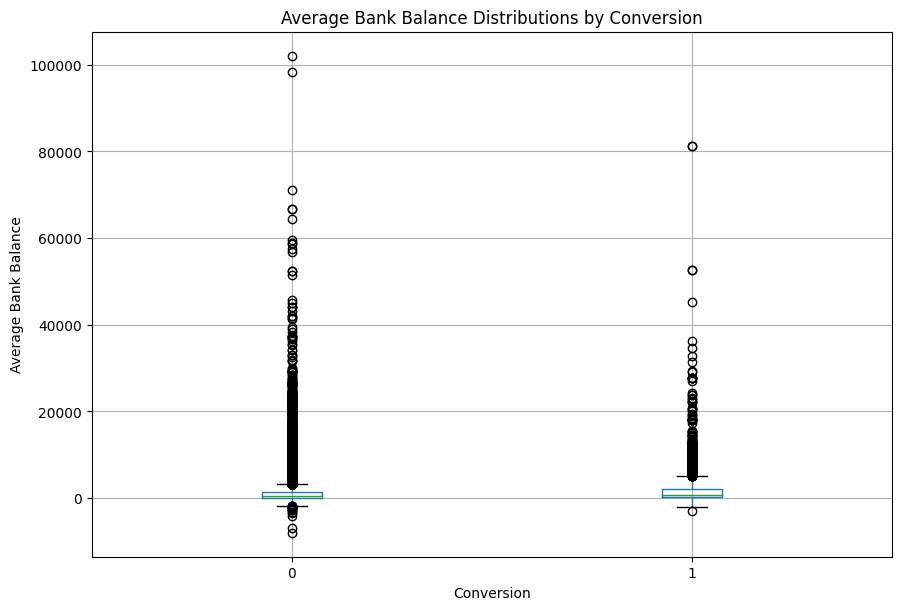

In [8]:
# let's visualize how iur iutput variable (converted) changes with difference income 
ax = bank[['converted','balance']].boxplot(by='converted', showfliers=True, figsize=(10,7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle('')
plt.show()

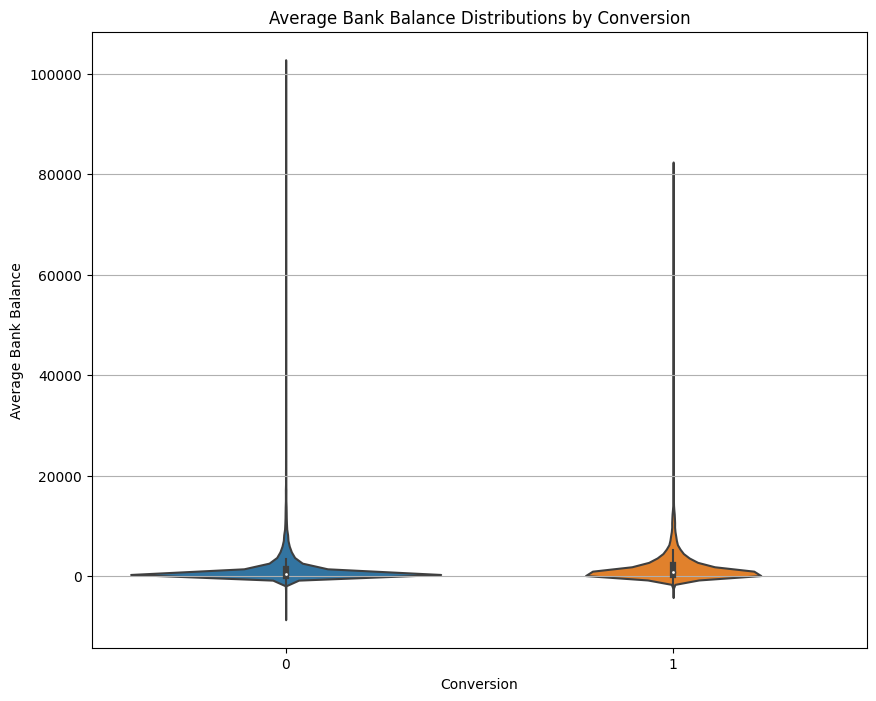

In [9]:
# LEt's do some thing with violin plots

import seaborn as sns 

fontsize = 10

fig, axes = plt.subplots()

fig.set_size_inches(10, 8)

sns.violinplot(x='converted', y='balance', data=bank, ax=axes)
axes.set_title('Average Bank Balance Distributions by Conversion')

axes.yaxis.grid(True)
axes.set_xlabel('Conversion')
axes.set_ylabel('Average Bank Balance')


plt.show()

In [10]:
bank['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [11]:
# conversion rate by campaign
conversions_by_contacts = bank.groupby('campaign')['converted'].sum()/bank.groupby('campaign')['converted'].count() * 100
# let's see the top ten campaign in terms of % converted
conversions_by_contacts.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: converted, dtype: float64

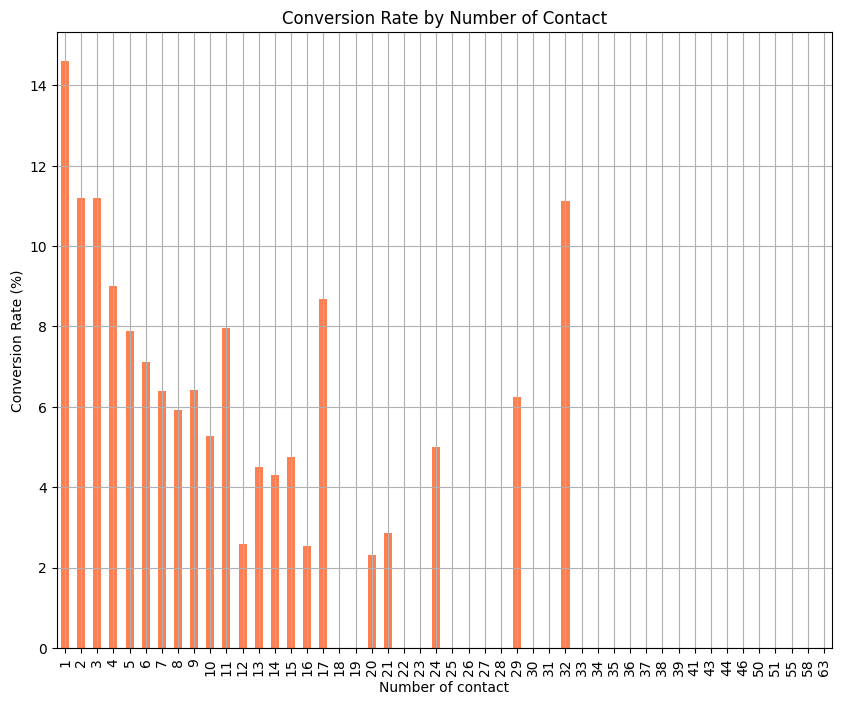

In [12]:
ax = conversions_by_contacts.plot(
    kind='bar',
    figsize=(10, 8),
    title='Conversion Rate by Number of Contact',
    grid=True,
    color='coral'
)
         
    
ax.set_xlabel('Number of contact')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

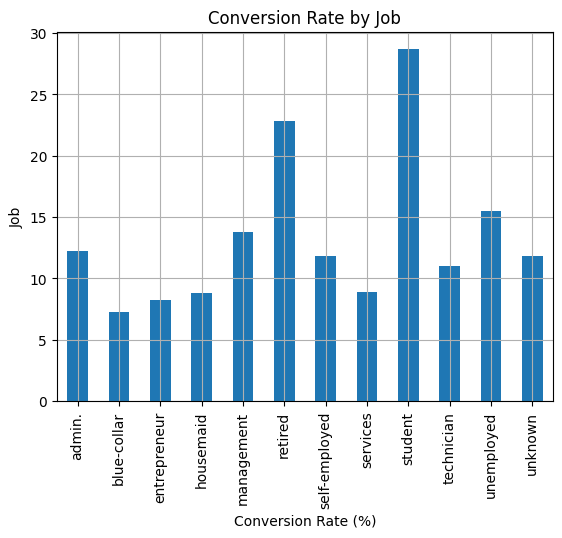

In [13]:
# how about conversion rate by job?
conversion_rate_by_job = bank.groupby(by='job')['converted'].sum() / bank.groupby(by='job')['converted'].count() * 100
ax = conversion_rate_by_job.plot(kind='bar', grid=True, title='Conversion Rate by Job')

ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')

plt.show()

In [14]:
# Get our categorical type columns

cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['education',
 'job',
 'month',
 'contact',
 'default',
 'poutcome',
 'loan',
 'y',
 'marital',
 'housing']

We need to encode our categorical variables

In [15]:
# Starting with month first
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [16]:
bank.groupby('month').count()['converted']

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [17]:
months = ['jan', 'feb','mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']

bank['month'] = bank['month'].apply(lambda x : months.index(x)+1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0


Encoding house

In [18]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
bank['housing'] = bank['housing'].apply(lambda x : 1 if x =='yes' else 0 )
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,converted
0,58,management,married,tertiary,no,2143,1,no,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,1,no,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,1,yes,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,1,no,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,0,no,unknown,5,5,198,1,-1,0,unknown,no,0


Encoding Loan

In [20]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
bank['loan'] = bank['loan'].apply(lambda x : 1 if x=='yes' else 0)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,converted
0,58,management,married,tertiary,no,2143,1,0,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,5,198,1,-1,0,unknown,no,0


Encode education

In [22]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [23]:
# bank.head().drop(['education_primary','education_secondary','education_tertiary','education_unknown'], axis=1)

In [24]:
bank = pd.get_dummies(data=bank, columns=['education'], dtype=int)
bank.head()

,age,job,marital,default,balance,housing,loan,contact,day,month,...,campaign,pdays,previous,poutcome,y,converted,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,no,2143,1,0,unknown,5,5,...,1,-1,0,unknown,no,0,0,0,1,0
1,44,technician,single,no,29,1,0,unknown,5,5,...,1,-1,0,unknown,no,0,0,1,0,0
2,33,entrepreneur,married,no,2,1,1,unknown,5,5,...,1,-1,0,unknown,no,0,0,1,0,0
3,47,blue-collar,married,no,1506,1,0,unknown,5,5,...,1,-1,0,unknown,no,0,0,0,0,1
4,33,unknown,single,no,1,0,0,unknown,5,5,...,1,-1,0,unknown,no,0,0,0,0,1


Encoding contact 

In [25]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [26]:
bank = pd.get_dummies(data=bank, columns=['contact'], dtype=int)
bank.head()

,age,job,marital,default,balance,housing,loan,day,month,duration,...,poutcome,y,converted,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,management,married,no,2143,1,0,5,5,261,...,unknown,no,0,0,0,1,0,0,0,1
1,44,technician,single,no,29,1,0,5,5,151,...,unknown,no,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,no,2,1,1,5,5,76,...,unknown,no,0,0,1,0,0,0,0,1
3,47,blue-collar,married,no,1506,1,0,5,5,92,...,unknown,no,0,0,0,0,1,0,0,1
4,33,unknown,single,no,1,0,0,5,5,198,...,unknown,no,0,0,0,0,1,0,0,1


Encode defauld

In [27]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
bank.head()

,age,job,marital,default,balance,housing,loan,day,month,duration,...,poutcome,y,converted,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,management,married,no,2143,1,0,5,5,261,...,unknown,no,0,0,0,1,0,0,0,1
1,44,technician,single,no,29,1,0,5,5,151,...,unknown,no,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,no,2,1,1,5,5,76,...,unknown,no,0,0,1,0,0,0,0,1
3,47,blue-collar,married,no,1506,1,0,5,5,92,...,unknown,no,0,0,0,0,1,0,0,1
4,33,unknown,single,no,1,0,0,5,5,198,...,unknown,no,0,0,0,0,1,0,0,1


In [29]:
bank['default'] = bank['default'].apply(lambda x: 1 if x == 'yes' else 0)

Encode poutcome

In [30]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [31]:
bank = pd.get_dummies(data=bank, columns=['poutcome'], dtype=int)

In [32]:
bank.head()

,age,job,marital,default,balance,housing,loan,day,month,duration,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,0,2143,1,0,5,5,261,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,single,0,29,1,0,5,5,151,...,1,0,0,0,0,1,0,0,0,1
2,33,entrepreneur,married,0,2,1,1,5,5,76,...,1,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,0,1506,1,0,5,5,92,...,0,0,1,0,0,1,0,0,0,1
4,33,unknown,single,0,1,0,0,5,5,198,...,0,0,1,0,0,1,0,0,0,1


In [33]:
# check categorical columns are left

# Get our categorical type columns

cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['y', 'marital', 'job']

In [34]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [35]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [36]:
bank = pd.get_dummies(data=bank, columns=['job'], dtype=int)
bank.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,0,2143,1,0,5,5,261,1,...,0,0,1,0,0,0,0,0,0,0
1,44,single,0,29,1,0,5,5,151,1,...,0,0,0,0,0,0,0,1,0,0
2,33,married,0,2,1,1,5,5,76,1,...,1,0,0,0,0,0,0,0,0,0
3,47,married,0,1506,1,0,5,5,92,1,...,0,0,0,0,0,0,0,0,0,0
4,33,single,0,1,0,0,5,5,198,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
bank = pd.get_dummies(data=bank, columns=['marital'], dtype=int)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,0,0,0,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,1


In [38]:
bank.drop('y', axis=1, inplace=True)

In [39]:
bank.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'converted',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')

In [40]:
# check again 


cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [41]:
Y_train = bank['converted']
X_train = bank.drop(labels=['converted'], axis =1)
X_train

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,0,0,0,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,0,0,0,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,11,456,2,-1,...,1,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,0,0,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,0,0,0,0,0,0,0,0,1,0


In [42]:
X_train.shape

(45211, 37)

Let's fit with Decision Tree Model

In [43]:
from sklearn import tree

dec_tree_model = tree.DecisionTreeClassifier(max_depth=3)


In [44]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [46]:
features = list(X_train.columns)
response_var = 'converted'

In [47]:
features

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

Generate and Visualize Our Decision Tree

In [48]:
import graphviz

# we export our tree to a DOT format is a graphic decsription language
dot_data = tree.export_graphviz(dec_tree_model, feature_names=features, class_names=['0','1'],
                               filled=True, rounded=True, special_characters=True)


# create a visual graph of our tree
graph = graphviz.Source(dot_data)

Understanding our Tree:

1. The first line contains the split threshold.
2. The second line is the Gini impurity, which is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the distribution in the dataset.
3. The third line gives us the total number of records that belong to that node.
4. The fourth line in each node gives us the composition of the records in two different classes.
5. The fifth line is the class prediction (only used as a predictor when looking at the bottom nodes or root nodes).



Baris pertama berisi ambang pemisahan. Ini adalah nilai ambang yang digunakan untuk membagi dataset ke dalam dua kelompok berdasarkan fitur tertentu.

Baris kedua adalah ketidakmurnian Gini, yang merupakan ukuran seberapa baik dataset dibagi menjadi kelas yang berbeda. Semakin rendah nilai Gini impurity, semakin baik pemisahan kelasnya.

Baris ketiga memberikan total jumlah catatan yang termasuk dalam node tertentu dalam pohon keputusan. Ini menginformasikan seberapa besar atau kecil ukuran dataset pada tahap tertentu dalam pembentukan pohon.

Baris keempat di setiap node memberikan komposisi catatan dalam dua kelas yang berbeda. Ini memberi informasi tentang seberapa banyak catatan dalam dataset yang termasuk dalam setiap kelas di node tersebut.

Baris kelima adalah prediksi kelas. Ini adalah hasil prediksi kelas yang dilakukan oleh pohon keputusan pada node tersebut. Biasanya, ini hanya digunakan sebagai prediktor saat kita berada di node terbawah atau node root. Artinya, ini adalah prediksi akhir yang dihasilkan oleh pohon untuk instance tertentu setelah melewati serangkaian percabangan dan pengujian.


Saya meminta Chat gpt menjelaskan kaliamt diatas lebih jelas dengan analogi dan metafora : 

Tentu, mari kita analogikan pemahaman tentang pohon keputusan dengan sesuatu yang lebih mudah dipahami.

Ambang Pemisahan Sebagai Pintu Gerbang: Bayangkan dataset sebagai sebuah taman dengan banyak pintu masuk. Ambang pemisahan adalah seperti pintu gerbang yang membagi tamannya menjadi dua bagian berdasarkan karakteristik tertentu, seperti tinggi pagar. Jika tinggi seseorang melebihi ambang tersebut, dia masuk ke dalam, jika tidak, dia keluar.

Ketidakmurnian Gini Sebagai Tingkat Kekacauan: Ketidakmurnian Gini adalah ukuran seberapa bingungnya kita jika ditanya, "Berapa persen mungkin Anda salah memberi label pada seseorang jika Anda harus mengklasifikasikan mereka hanya berdasarkan ciri-ciri tertentu?" Semakin sedikit kekacauan, semakin mudah bagi kita untuk memahami dan memprediksi.

Total Jumlah Catatan Sebagai Jumlah Orang di Taman: Baris ketiga memberi tahu kita berapa banyak orang yang ada di taman pada titik tertentu. Ini memberi kita gambaran tentang seberapa padat atau sepi taman pada saat itu.

Komposisi Catatan Dalam Dua Kelas Sebagai Pembagian Penduduk: Ini seperti mendapatkan informasi tentang berapa banyak penduduk yang tinggal di sebelah utara taman dan berapa banyak yang tinggal di sebelah selatan. Ini memberi kita gambaran tentang sebaran populasi di sekitar pintu gerbang tertentu.

Prediksi Kelas Sebagai Ramalan Cuaca: Prediksi kelas pada akhirnya adalah seperti ramalan cuaca untuk taman tersebut. Setelah melalui serangkaian pintu gerbang dan pengamatan cuaca, kita dapat membuat perkiraan tentang cuaca di taman pada titik tertentu. Analoginya, setelah melewati serangkaian percabangan dan pengujian, pohon memberi kita prediksi tentang kelas mana yang kemungkinan besar dimiliki oleh data yang kita lihat.



Duration (Durasi): Durasi merujuk pada waktu atau panjangnya periode tertentu. Dalam konteks yang lebih umum, durasi dapat merujuk pada interval waktu antara dua titik dalam waktu tertentu. Misalnya, dalam analisis data, durasi dapat merujuk pada lamanya waktu antara dua kejadian.

Gini (Ketidakmurnian Gini): Gini, dalam konteks pohon keputusan atau analisis klasifikasi lainnya, adalah ukuran ketidakmurnian atau ketidakpastian di dalam sebuah set data. Nilai Gini mengindikasikan seberapa baik sebuah node dalam pohon keputusan memisahkan kelas-kelas yang berbeda. Semakin rendah nilai Gini, semakin baik pemisahan kelasnya.

Samples (Sampel): Sampel merujuk pada contoh-contoh individu atau observasi dalam sebuah set data. Dalam konteks pohon keputusan, sampel mengacu pada jumlah titik data atau observasi yang termasuk dalam suatu node tertentu dalam pohon tersebut.

Values (Nilai): Nilai dalam konteks pohon keputusan mengacu pada distribusi kelas atau label di dalam suatu node. Ini menginformasikan tentang jumlah sampel dalam node tersebut yang termasuk dalam setiap kelas atau label yang mungkin.

Class (Kelas): Kelas mengacu pada label atau kategori yang ingin diprediksi atau diklasifikasikan oleh model. Dalam konteks pohon keputusan, kelas-kelas ini adalah hasil dari prediksi yang dilakukan oleh model untuk setiap sampel data. Misalnya, dalam masalah klasifikasi biner, kelas-kelas mungkin menjadi "positif" dan "negatif", sedangkan dalam masalah klasifikasi multi-kelas, kelas-kelas dapat lebih dari dua.

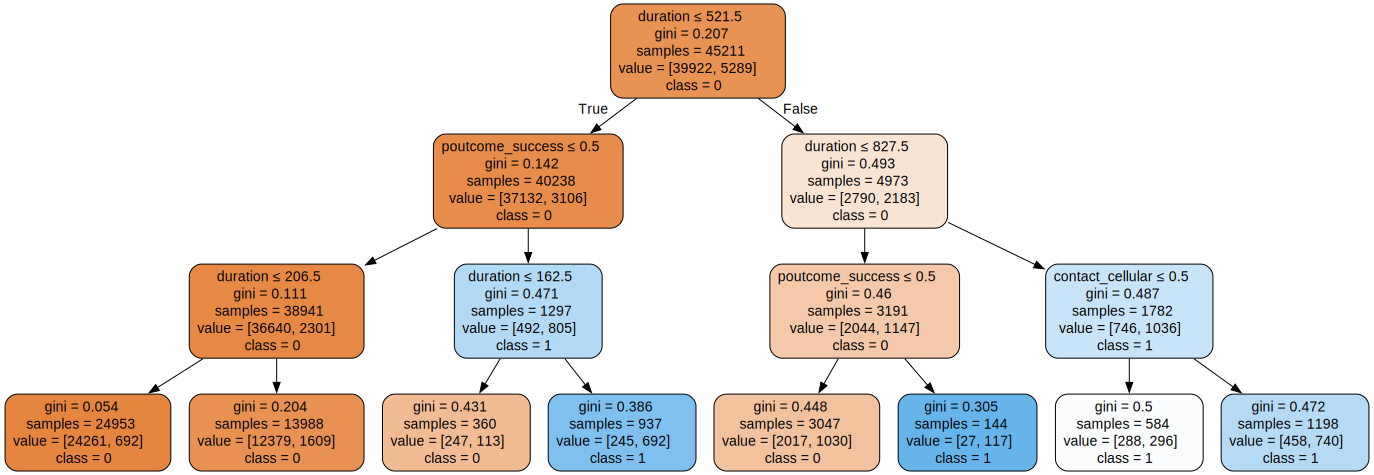

In [49]:
graph

In [50]:
from sklearn.base import clone
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature' : column_names,
                      'feature_importance': importances}).sort_values('feature_importance', ascending=False).reset_index(drop=True)
    return df

def drop_col_feat_imp(model, X_train, y_train, random_state=42):
    
    model_clone = clone(model)
    
    model_clone.random_state = random_state
    
    model_clone.fit(X_train, y_train)
    
    benchmark_score = model_clone.score(X_train, y_train)
    
    importances = []
    
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state 
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis=1), y_train)
        importances.append(benchmark_score - drop_col_score)
        
    importances_df = imp_df(X_train.columns, importances)
    return importances_df


In [51]:
drop_col_feat_imp(dec_tree_model, X_train, Y_train)

,feature,feature_importance
0,poutcome_success,0.011878
1,duration,0.008339
2,job_self-employed,0.000000
3,poutcome_unknown,0.000000
4,job_admin.,0.000000
5,job_blue-collar,0.000000
6,job_entrepreneur,0.000000
7,job_housemaid,0.000000
8,job_management,0.000000
9,job_retired,0.000000


Berikut ini kesimpulannya : 
1. Fitur poutcome_succes (previous outcome yang berhasil )memiliki nilai importance paling tinggi. Ini menunjukkan bahwa keberhasilan transaksi sebelumnya menentukan pengaruh yang signifikan. 
2. BErikutnya adalah duration, yang menunjukkan durasi interakssi dengan customer sangat menentukan.
3. Banyak fitur yang nilainya 0, menunjukkan bahawa fitur fitur ini tidak memiliki pengaruh pada kinerja model.
4. Fitur contact_cellular memiliki nilai negatif. Ini menunjikkan penggunaan seluler dalam konteks pemasaran memiliki pengaruh negatif pada kinerja.
